Dimensions of the img: (1012, 1012)
boundaries of QR code are: 43 969 43 969
Dimensions of the QR code without QZ: (926, 926)
hello
Dimensions of the QR code after resizing: (945, 945)
(21, 21, 45, 45)
[[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0]
 [0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0]
 [1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0]
 [1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1

ReedSolomonError: Too many errors to correct

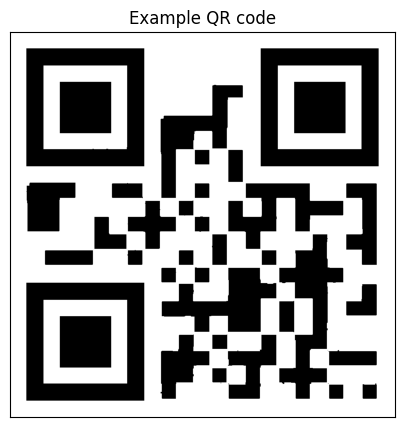

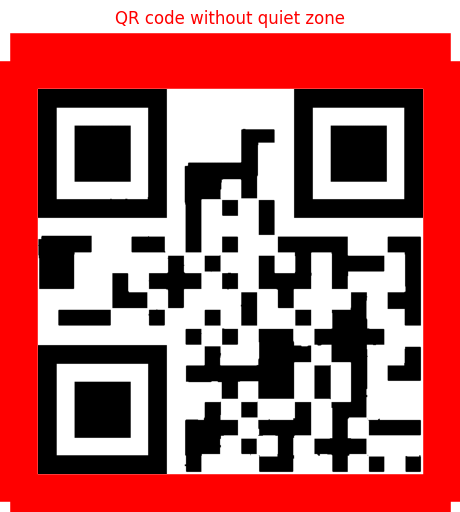

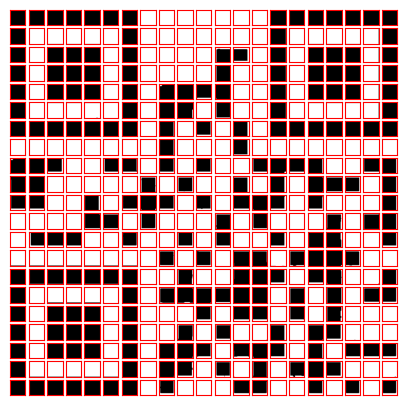

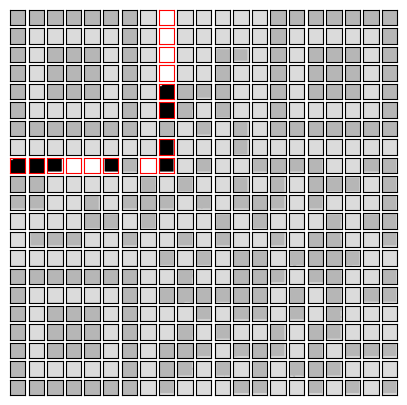

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade reedsolo
import reedsolo as rs
from builtins import map

#1#imporing image and making it black and white // and ploting it

img = cv2.imread("/content/tc10Fixed.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code')
plt.imshow(img, cmap='gray');
print("Dimensions of the img:",img.shape)

#2#reading queit zone // reading where is the white part that surrounds QR code and indicating the boundaries of the QR code
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print("boundaries of QR code are:", start_row, end_row, start_col, end_col)


#3#taking the indicated boundaries of the QR code plotting it, removing all white space surrounding it
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

# calculating dimensions of the QR code without the quiet zone (.shape get dimensions of the array)
print("Dimensions of the QR code without QZ:",qr_no_quiet_zone.shape)


#using this QR code version 1, the qr have 21 unique square in each dimension .. so we'll make grid of 21x21 cell

grid_cells_num = 21

#check if qr code dimensions without QZ is square , if not make it square
newsize = max(qr_no_quiet_zone.shape[0], qr_no_quiet_zone.shape[1])
#ensure that the new size is multiple of 21:
newsize = grid_cells_num * np.ceil(newsize / grid_cells_num).astype(int)
qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (newsize, newsize))
print("hello")


grid_cell_size= qr_no_quiet_zone.shape[0]//grid_cells_num


print("Dimensions of the QR code after resizing:",qr_no_quiet_zone.shape)


#4#now we grid the QR code into small boxes using .reshape
#grid_cells_num: number of rows and cols of the small boxes
#grid_cell_size: size of each small box
#.swapaxes : arrange the splitted small boxes correctly and aligned like the original QR code
qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)


#plot the QR in small boxes each box framed in red frame
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

#5#converting each grid cell to a numeric value such that / if common color white=1/ common color black =0
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)



#INFORMATION EXTRACTION
#NOTEE: the QR code and our map have opposite ideas of what's black and what's white.
# So, we flip the bits (change 0 to 1 and 1 to 0) to make them match the real QR code

#6 . inspecting 8th row
#checking first 2 bits QR to indicate the error recovery level of the QR code
# We want row #8
qr_cells_numeric[8]

# The first two bits determine the error correction level
# Level L (Low)         [11]	7%  of data bytes can be restored. ('11') mean the lock is weaker
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.
ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)

#next 3 cells indicate mask used on the qr code
#Before QR code is finally generated, the data bits must be XOR-ed with mask pattern.
#There are 8 mask pattern that available in QR code, namely mask pattern 0 to 7 (or 000 to 111 in binary).
#This process have a purpose of making QR code more readable by QR scanner.
# If there are large blocks of all black or all white, it might confuse the scanner, making it hard to read the code accurately.
# Using a mask changes parts of the QR code in a way that breaks up these blocks:

# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)


# Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
#  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)

fec = [] #fec= Format Error Correction //list where we will collect some infor about QR
#collect 5th and 7th cells in 8th row /and 8th column except 6th elements as it is always=1
fec.append(qr_cells_numeric[8, 5])
fec.append(qr_cells_numeric[8, 7])
fec.extend(qr_cells_numeric[0:6, 8])
fec.extend(qr_cells_numeric[7:9, 8])
fec = [int(not(c)) for c in fec]
print(fec)

# So in total we have the following 15 bits of format info from our QR code
#summary of the special settings the QR code uses to ensure it is read correctly and robustly.
print("Error correction level:",ecl," , mask:", mask, "fec",  fec)

# Let's cross-check with our example
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):

        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        if (i == 8 and j <= 8) or (i <= 8 and j == 8):
            if (i != 6) and (j != 6):
                col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
                col.spines[:].set_color('red')
                continue
        col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

# However..... You need to XOR that with the "format mask": 101010000010010
ecl[0] ^= 1
mask[0] ^= 1
mask[2] ^= 1
fec[5] ^= 1
fec[8] ^= 1

# And now we print...
print(ecl, mask, fec)

# Before we proceed, let's write a function for masking to make our lives easier
UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

#DATA ENCODING

enc_bits = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
enc_int = int(''.join([str(bit) for bit in enc_bits]), 2)
print(f'{enc_bits} = Byte encoding (8 bits per character)')

len_bits = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

data_starting_indices = [
    [grid_cells_num-7,  grid_cells_num-1,  UP],    #    w    /     H
    [grid_cells_num-11, grid_cells_num-1,  CCW],   #    w    /     e
    [grid_cells_num-10, grid_cells_num-3,  DOWN],  #    w    /     l
    [grid_cells_num-6,  grid_cells_num-3,  DOWN],  #    .    /     l
    [grid_cells_num-2,  grid_cells_num-3,  CW],    #    w    /     o
    [grid_cells_num-3,  grid_cells_num-5,  UP],    #    i    /     ,
    [grid_cells_num-7,  grid_cells_num-5,  UP],    #    k    /  (space)
    [grid_cells_num-11, grid_cells_num-5,  CCW],   #    i    /     Q
    [grid_cells_num-10, grid_cells_num-7,  DOWN],  #    p    /     R
    [grid_cells_num-6,  grid_cells_num-7,  DOWN],  #    e    /  (space)
    [grid_cells_num-2,  grid_cells_num-7,  CW],    #    d    /     W
    [grid_cells_num-3,  grid_cells_num-9,  UP],    #    i    /     o
    [grid_cells_num-7,  grid_cells_num-9,  UP],    #    a    /     r
    [grid_cells_num-11, grid_cells_num-9,  UP],    #    .    /     l
    [grid_cells_num-16, grid_cells_num-9,  UP],    #    o    /     d
    [grid_cells_num-20, grid_cells_num-9,  CCW],   #    r    /     !
    [grid_cells_num-19, grid_cells_num-11, DOWN],  #    g    /     1
    [grid_cells_num-14, grid_cells_num-11, DOWN],  # End of message (Terminator)
    [grid_cells_num-12, grid_cells_num-11, DOWN],  # E1
    [grid_cells_num-8,  grid_cells_num-11, DOWN],  # E2
    [grid_cells_num-4,  grid_cells_num-11, DOWN],  # E3
    [grid_cells_num-9,  grid_cells_num-13, UP],    # E4
    [grid_cells_num-12, grid_cells_num-16, DOWN],  # E5
    [grid_cells_num-9,  grid_cells_num-18, UP],    # E6
    [grid_cells_num-12, grid_cells_num-20, DOWN],  # E7
]




message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
extracted_data_no_error_correction = ''
for a, b, d in data_starting_indices:  # For each starting index and direction
    bits = apply_mask(a, b, d)  # Extract the bits per the indexed QR code symbol
    bit_string = ''.join([str(bit) for bit in bits])  # Convert to string of bits
    alpha_char = chr(int(bit_string, 2))  # Convert binary to int, then to a char
    if bit_string[:4] == "0000":  # If the first 4 bits are 0s, this is the END
        print(f'{bit_string[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
        message_bits.extend(bits[:4])  # Append only the four bits
    else:  # If not the END symbol, append full set of bits
        message_bits.extend(bits)
        extracted_data_no_error_correction += alpha_char
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')

print(f'\ni.e., the data and ECCs in the QR code as-is are "{extracted_data_no_error_correction}"')
# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]
# Create the Reed-Solomon Codec for 7 ECC symbols
rsc = rs.RSCodec(nsym=7)
# Decode the bytes with the 7-ECC RS Codec
message_decoded = rsc.decode(message_bytes)
print('\nNow decoding...\n')
rsc.maxerrata(verbose=True)
print(f'Decoded message = "{message_decoded[0].decode(encoding="iso-8859-1")}"')
print(f'Decoded ECCs    = "{message_decoded[1][-7:].decode(encoding="iso-8859-1")}"')
# In order to extract the actual data, need to convert back to bits and...
# ...remove the initial 12 bits (enc and len) and last 4 bits (terminator)
data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]
# Now convert back to bytes and print it lol
data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')
print(f'Data should be... "Hello, QR World!1" - and yes there\'s a \'1\' after the \'!\'')